<a href="https://colab.research.google.com/github/roseberr/data-analysis/blob/master/keggle/TMDB_5000/TMDB_5000_movie_Dataset_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sn
from sklearn.metrics import confusion_matrix
import torch
import torchvision
import torchtext

In [2]:
!git clone https://github.com/roseberr/data-analysis.git

fatal: destination path 'data-analysis' already exists and is not an empty directory.


In [3]:
df1=pd.read_csv('/content/drive/My Drive/Colab Notebooks/데이터분석 /tmdb_5000_keggle/tmdb_5000_credits.csv')
df2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/데이터분석 /tmdb_5000_keggle/tmdb_5000_movies.csv')
#print(df1)
df1.columns
#print(df2)
#print(df2.columns)
#print(df2['id'])
df1.shape
#df1.head()
df2.shape
df2.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


2개의 csv파일을 id에 맞춰서 merge


In [4]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')
print(df2)
print(df2.columns)

         budget  ...                                               crew
0     237000000  ...  [{"credit_id": "52fe48009251416c750aca23", "de...
1     300000000  ...  [{"credit_id": "52fe4232c3a36847f800b579", "de...
2     245000000  ...  [{"credit_id": "54805967c3a36829b5002c41", "de...
3     250000000  ...  [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4     260000000  ...  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
...         ...  ...                                                ...
4798     220000  ...  [{"credit_id": "52fe44eec3a36847f80b280b", "de...
4799       9000  ...  [{"credit_id": "52fe487dc3a368484e0fb013", "de...
4800          0  ...  [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...
4801          0  ...  [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...
4802          0  ...  [{"credit_id": "58ce021b9251415a390165d9", "de...

[4803 rows x 23 columns]
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overvi

In [5]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
df2.shape

(4803, 23)

In [7]:
df2.overview.head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Demographic Filtering -인구 통계학적 관점에서 더 인기가 많고 평론가들로부터 호평을 받은 영화들은 평균 관객들에게 호감을 받을 확률이 높다. 그러나 너무 단순하다

weighted rating(WR)= (v/v+m)*R+ (m/v+m)*C

V=영화 투표수 M=min 투표수 R=영화 평균점수(시청률) C=전체 영화의 평균 투표수

In [8]:
C= df2['vote_average'].mean()
C

6.092171559442011

적어도 90프로 이상의 영화투표받은것들 선별

In [9]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [10]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

In [0]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [0]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [13]:
q_movies = q_movies.sort_values('score', ascending=False)


q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


graph 그리기

Text(0.5, 1.0, 'Popular Movies')

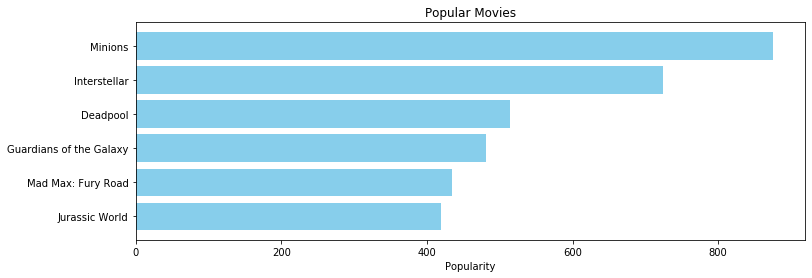

In [14]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Text(0.5, 1.0, 'Score Movie')

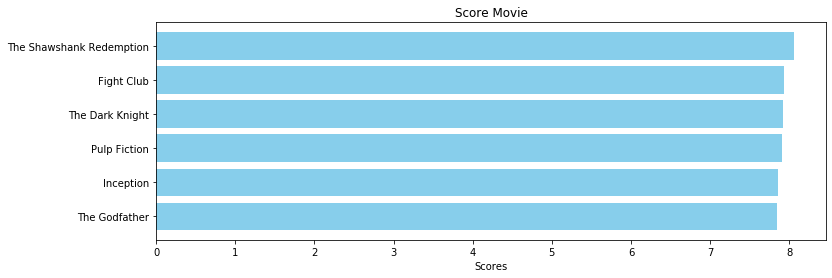

In [15]:
pop= q_movies.sort_values('score', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['score'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Scores")
plt.title("Score Movie")

Content based filtering

overview, cast, crew, keyword, tagline를 사용해서 추천
만약 어떤 사람이 특정 아이템을 좋아한다면 그 또한 그것과 비슷한 아이템을 좋아할 것이다.

In [16]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

문장을 숫자로 변환해야한다 그래서 TF-IDF사용 


TF-IDF= (단어 빈도=단어가 문서에 나오는 빈도) * (역문서빈도=전체 문서에서 특정단어가 나온 문서의 빈도)

이걸쓰면 각열이 개요 어휘의 단어를 나타내고 
즉 포함되어 있는 단어의 중요성에 따라 그 단어와 문서의 연관성 계산한다 TF=(특정 단어가 나온수/전체단어)  IDF=(1+log(전체 문서의 수/특정 단어를 포함하는 문서의 수))

In [17]:
#싸이킷런에는 tf-idf matrix를 만들어주는 함수존재
from sklearn.feature_extraction.text import TfidfVectorizer

#remove english는 영어의 stop word를 지운다 예를들면 the a 
tfidf = TfidfVectorizer(stop_words='english')

df2['overview'] = df2['overview'].fillna('')

tfidf_matrix = tfidf.fit_transform(df2['overview']) #tf-idf matrix 생성
tfidf_matrix.shape #4803편의 영화 표현위해서 20978개의 단어사용

(4803, 20978)

생성된 tf-idf matrix로 유사한 점수를 계산할수 있다.
우리는 이제 유사한 점수를 계산할수 있다 ex)유클리드,피어슨,코사인 유사성 점수가 있다.

그중 코사인 유사성을 사용할려고 한다 쉽고 빠르기 때문
similarity=cos=(A*B)/|A||B|






In [18]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim[:5])

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.02160533 0.         0.        ]
 [0.         0.         1.         ... 0.01488159 0.         0.        ]
 [0.02499512 0.         0.         ... 0.03386366 0.04275232 0.02269198]
 [0.         0.03336868 0.         ... 0.00612609 0.         0.        ]]


In [19]:
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()
print(indices)

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64


In [0]:
def get_recommendations(title, cosine_sim=cosine_sim):
   #제목에 맞는 title 가져온다
    idx = indices[title]

    #유사도 list 가져오기
    sim_scores = list(enumerate(cosine_sim[idx]))

    #정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

   
    sim_scores = sim_scores[1:11]

    # movie indices 가져오기
    movie_indices = [i[0] for i in sim_scores]

    # Return
    return df2['title'].iloc[movie_indices]

각각 영화제목의 overview와 맞는 영화 출력

In [21]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [22]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

overview 뿐만아니라 3대 톱배우, 감독,관련장르,영화 줄거리 키워드를 바탕으로 추천인 구축

출연진,제작진,키워드 특징에서 관련 키워드를 추출해야한다.

현재는 "stringified" lists 이기에 literal_eval을 더한후 추출 


In [23]:
features = ['cast', 'crew', 'keywords', 'genres']

df2[features]

,cast,crew,keywords,genres
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
...,...,...,...,...
4798,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...","[{""id"": 5616, ""name"": ""united states\u2013mexi...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4799,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",[],"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""..."
4800,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
4801,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...",[],[]


In [0]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)
    

In [0]:
#crew feature에서 director의 이름 return 없으면 NAN return
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

cast keywords genres의 element추출 

In [0]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
     #check 하고 3개이상의 element가 있을경우 3개만 return 
        if len(names) > 3:
            names = names[:3]
        return names

    #결측치 있을경우 빈 list 반환
    return []

In [0]:
df2['director'] = df2['crew'].apply(get_director)



features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [28]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


우리가 vectorizer 하기전에 "Johnny Depp" 과 "Johnny Galecki"가 같은 이름인줄 알수도 있으니 
 
 이름의 space를 없애는 전처리


In [0]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
      # director 존재하는지 확인하고 없으면 스페이스바 return
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''


features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

metadata soup를 만든다 keywords 랑 cast랑 director랑 genres를 합쳐서

In [0]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

Recommander vectorizer를 적용하는데 tf-idf를 쓰지않고 countvectorizer를 쓰는이유는

overview일떄는 상대적으로 많은 영화에서 같은 단어가 있으면 좋지 않아서 tf-idf를 썻지만

soup같은 경우 상대적으로 많은 영화에서 연기나 감독을 했다고 배우나 감독의 존재감을 낮게 평가할 이유가 없기때문


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

indices = pd.Series(df2.index, index=df2['title'])

'title', 'cast', 'director', 'keywords', 'genres' 로 영화추천하는 함수 생성

In [33]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [34]:
get_recommendations('The Avengers', cosine_sim2)

7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
169     Captain America: The First Avenger
174                    The Incredible Hulk
85     Captain America: The Winter Soldier
31                              Iron Man 3
33                   X-Men: The Last Stand
68                                Iron Man
94                 Guardians of the Galaxy
Name: title, dtype: object